# English Wikipedia Page Views by Topics in Septermber & August 2019


https://phabricator.wikimedia.org/T234839

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this notebook is by default hidden for easier reading.
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code"></form>
''')

In [2]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import gzip
from wmfdata import hive
import numpy as np

You can find the source for `wmfdata` at https://github.com/neilpquinn/wmfdata


In [3]:
##read topic prediction file
topic = pd.read_csv('topic_prediction.tsv.gz', sep='\t',compression='gzip', header=0)

In [4]:
topic.head()

,page_title_x,page_id,rev_id,predicted,is_human,has_geo,has_list,country_association,topic,topic_first_encountered,best1,best1_score,best2,best2_score,best3,best3_score,best4,best4_score,best5,best5_score
0,Anarchism,12,918470367,History and society,NaN,NaN,NaN,NaN,WikiProject Alternative Views,WikiProject Alternative Views,Culture.Language and literature,0.569309,History_And_Society.History and society,0.562225,Culture.Philosophy and religion,0.442044,Geography.Europe,0.387627,History_And_Society.Politics and government,0.326678
1,Autism,25,917934164,History and society,NaN,NaN,NaN,NaN,WikiProject Autism,WikiProject Medicine,STEM.Medicine,0.989822,History_And_Society.History and society,0.461722,STEM.Biology,0.204639,Culture.Language and literature,0.140741,Geography.Countries,0.064985
2,Albedo,39,918135123,Space,NaN,NaN,NaN,NaN,WikiProject Astronomy,WikiProject Physics,STEM.Meteorology,0.702232,STEM.Space,0.690529,STEM.Physics,0.331766,STEM.Geosciences,0.196708,History_And_Society.History and society,0.120394
3,A,290,917889681,Language and literature,NaN,NaN,NaN,NaN,WikiProject Writing systems,WikiProject Writing systems,Culture.Language and literature,0.336969,Geography.Europe,0.236182,History_And_Society.History and society,0.152089,Geography.Countries,0.120197,Assistance.Maintenance,0.072683
4,Alabama,303,916946133,United States,NaN,1.0,NaN,United States,WikiProject Alabama,WikiProject Alabama,Geography.Countries,0.803770,History_And_Society.History and society,0.174996,History_And_Society.Politics and government,0.133188,Culture.Language and literature,0.068806,Assistance.Maintenance,0.064497


In [5]:
pageview_query = '''
    SELECT 
        CONCAT(year,"-",month,"-01") AS date,
        page_id, 
        SUM(view_count) AS pageviews
    FROM 
        wmf.pageview_hourly
    WHERE year = "{year}"
        AND month = "{month}" 
        AND project = "{wiki}"
        AND agent_type = "user"
        AND NOT (country_code IN ("PK", "IR", "AF") 
        AND user_agent_map["browser_family"] = "IE" AND user_agent_map["browser_major"] = 7)
    GROUP BY CONCAT(year,"-",month,"-01"), page_id
'''

## September 2019 Topic Analysis 

In [6]:
enwiki_pv_sept = hive.run([
    "SET mapreduce.map.memory.mb=4096",    
     pageview_query.format(
        year = 2019,
        month = 9,
        wiki = "en.wikipedia")
])

In [7]:
enwiki_pv_sept['proportion']= enwiki_pv_sept['pageviews']/enwiki_pv_sept['pageviews'].sum()
enwiki_pv_sept = enwiki_pv_sept.sort_values(by='pageviews', ascending=False)

In [8]:
enwiki_pv_sept[enwiki_pv_sept.page_id.isnull()]

,date,page_id,pageviews,proportion
7605694,2019-9-01,NaN,180770684,0.024105


In [9]:
print('Total page views: ' + str(enwiki_pv_sept.pageviews.sum()))

Total page views: 7499288007


In [10]:
print('Number of unqiue pages: ' + str(enwiki_pv_sept.shape[0]))

Number of unqiue pages: 14719499


In [11]:
print('Top 1M pages account for ' + str(round(enwiki_pv_sept.proportion[:1000000].sum() * 100,2)) + '% of total page views.')

Top 1M pages account for 90.97% of total page views.


In [12]:
enwiki_pv_topic_sept = enwiki_pv_sept.merge(topic, how = 'left', on = 'page_id')

In [13]:
enwiki_pv_topic_sept['predicted'] = enwiki_pv_topic_sept['predicted'].fillna(value='Unknown')
enwiki_pv_topic_sept['proportion']= enwiki_pv_topic_sept['pageviews']/enwiki_pv_topic_sept['pageviews'].sum()

### September Top 50 Articles Read 

The table below shows the top 50 articles viewed in English Wikipedia in September 2019, with the corresponding propotions among the total pageviews and the best predicted topic.

In [14]:
enwiki_page_sept_summary = enwiki_pv_topic_sept[['page_title_x','pageviews','proportion','predicted']].sort_values(by='pageviews', ascending=False).reset_index(drop=True).head(50)


In [15]:
print('Top 50 articles account for ' +  str(round(enwiki_page_sept_summary.proportion.sum() * 100,2))+ '% of total page views in September.')

Top 50 articles account for 9.92% of total page views in September.


In [16]:
enwiki_page_sept_summary

,page_title_x,pageviews,proportion,predicted
0,Main_Page,473316359,0.063113,Internet culture
1,NaN,180770684,0.024104,Unknown
2,Wikipedia,7376833,0.000984,Language and literature
3,List_of_Queen_of_the_South_episodes,6426243,0.000857,Broadcasting
4,It_Chapter_Two,3777663,0.000504,Entertainment
5,Deaths_in_2019,3225335,0.000430,Time
6,Greta_Thunberg,3146905,0.000420,History and society
7,Saaho,2927278,0.000390,Entertainment
8,Joker_(2019_film),2864258,0.000382,Visual arts
9,September_11_attacks,2435866,0.000325,Politics and government


### September Top 50 Topics Viewed


The table below shows the page views by top 50 topics in September 2019 on English Wikipedia. Main page is excluded in this table.

In [17]:
enwiki_topic_sept_summary = (enwiki_pv_topic_sept[(enwiki_pv_topic_sept.page_title_x != 'Main_Page') & (enwiki_pv_topic_sept.page_title_x.notnull()) ]
          .groupby('predicted', as_index = False)['pageviews', 'proportion']
          .sum()
          .sort_values(by='pageviews', ascending=False))

In [18]:
print('Top 10 topics account for ' +  str(round(enwiki_topic_sept_summary.proportion[:10].sum() * 100,2))+ '% of total page views in September.')
print('Top 50 topics account for ' +  str(round(enwiki_topic_sept_summary.proportion[:50].sum() * 100,2))+ '% of total page views in September.')

Top 10 topics account for 59.99% of total page views in September.
Top 50 topics account for 88.23% of total page views in September.


In [19]:
enwiki_topic_sept_summary.head(50)

,predicted,pageviews,proportion
148,Entertainment,951021440,0.126812
424,Sports,651189558,0.086831
339,Performing arts,582191092,0.077631
75,Broadcasting,508966598,0.067867
202,History and society,490653572,0.065425
347,Politics and government,390911184,0.052125
245,Language and literature,233217751,0.031098
446,Technology,232996385,0.031068
83,Business and economics,228803305,0.030509
342,Philosophy and religion,228718462,0.030498


## September & August 2019 Topic Data Comparison

In [20]:
enwiki_pv_aug = hive.run([
    "SET mapreduce.map.memory.mb=4096",    
     pageview_query.format(
        year = 2019,
        month = 8,
        wiki = "en.wikipedia")
])

In [21]:
enwiki_pv_aug['proportion']= enwiki_pv_aug['pageviews']/enwiki_pv_aug['pageviews'].sum()
enwiki_pv_aug = enwiki_pv_aug.sort_values(by='pageviews', ascending=False)

In [22]:
print('Total page views for August: ' + str(enwiki_pv_aug.pageviews.sum()))

Total page views for August: 7511627660


In [23]:
enwiki_pv_topic_aug = enwiki_pv_aug.merge(topic, how = 'left', on = 'page_id')

In [24]:
enwiki_pv_topic_aug['predicted'] = enwiki_pv_topic_aug['predicted'].fillna(value='Unknown')
enwiki_pv_topic_aug['proportion']= enwiki_pv_topic_aug['pageviews']/enwiki_pv_topic_aug['pageviews'].sum()

### August Top 50 Articles Read 

In [25]:
enwiki_page_aug_summary = enwiki_pv_topic_aug[['page_title_x','pageviews','proportion','predicted']].sort_values(by='pageviews', ascending=False).reset_index(drop=True).head(50)


In [26]:
print('Top 50 articles account for ' +  str(round(enwiki_page_aug_summary.proportion.sum() * 100,2))+ '% of total page views in August.')

Top 50 articles account for 10.08% of total page views in August.


In [27]:
enwiki_page_aug_summary

,page_title_x,pageviews,proportion,predicted
0,Main_Page,474670505,0.063190,Internet culture
1,NaN,184375688,0.024545,Unknown
2,Jeffrey_Epstein,6671739,0.000888,History and society
3,Article_370_of_the_Constitution_of_India,4854035,0.000646,Politics and government
4,Wikipedia,4312210,0.000574,Language and literature
5,Line_shaft,4228564,0.000563,Technology
6,William_Murdoch,3880147,0.000517,Engineering
7,Once_Upon_a_Time_in_Hollywood,3548894,0.000472,Entertainment
8,Deaths_in_2019,3287539,0.000438,Time
9,Sushma_Swaraj,2632255,0.000350,Politics and government


### August Top 50 Topics Viewed

In [28]:
enwiki_topic_aug_summary = (enwiki_pv_topic_aug[(enwiki_pv_topic_aug.page_title_x != 'Main_Page') & (enwiki_pv_topic_aug.page_title_x.notnull()) ]
          .groupby('predicted', as_index = False)['pageviews', 'proportion']
          .sum()
          .sort_values(by='pageviews', ascending=False))

In [29]:
print('Top 10 topics account for ' +  str(round(enwiki_topic_aug_summary.proportion[:10].sum() * 100,2))+ '% of total page views in August')
print('Top 50 topics account for ' +  str(round(enwiki_topic_aug_summary.proportion[:50].sum() * 100,2))+ '% of total page views in August')

Top 10 topics account for 59.99% of total page views in August
Top 50 topics account for 88.14% of total page views in August


In [30]:
enwiki_topic_aug_summary.head(50)

,predicted,pageviews,proportion
148,Entertainment,1002079488,0.133400
424,Sports,628825688,0.083711
339,Performing arts,585580952,0.077954
75,Broadcasting,518241242,0.068990
202,History and society,502414853,0.066883
347,Politics and government,376050342,0.050061
245,Language and literature,232084472,0.030896
83,Business and economics,222093184,0.029566
446,Technology,221254456,0.029454
56,Biology,217965618,0.029016


### Top Topics Rank Comparison

In [31]:
enwiki_topic_sept_summary["sept_rank"] = enwiki_topic_sept_summary["proportion"].rank(ascending=0) 
enwiki_topic_aug_summary["aug_rank"] = enwiki_topic_aug_summary["proportion"].rank(ascending=0) 

In [32]:
topic_rank = enwiki_topic_sept_summary.merge(enwiki_topic_aug_summary, how = 'left', on = 'predicted')
topic_rank = topic_rank.rename(columns={'predicted': 'topic', 'proportion_x': 'proportion_sept','proportion_y': 'proportion_aug','pageviews_x':'pageviews_sept','pageviews_y':'pageviews_aug'})

In [33]:
topic_rank[['topic','proportion_sept','proportion_aug','sept_rank','aug_rank']].head(50)


,topic,proportion_sept,proportion_aug,sept_rank,aug_rank
0,Entertainment,0.126812,0.133400,1.0,1.0
1,Sports,0.086831,0.083711,2.0,2.0
2,Performing arts,0.077631,0.077954,3.0,3.0
3,Broadcasting,0.067867,0.068990,4.0,4.0
4,History and society,0.065425,0.066883,5.0,5.0
5,Politics and government,0.052125,0.050061,6.0,6.0
6,Language and literature,0.031098,0.030896,7.0,7.0
7,Technology,0.031068,0.029454,8.0,9.0
8,Business and economics,0.030509,0.029566,9.0,8.0
9,Philosophy and religion,0.030498,0.028953,10.0,11.0


There's no significant change in proportion and rank between September and August top 50 topics. 

In [34]:
topic_rank['rank_diff_abs'] = abs(topic_rank['sept_rank'] - topic_rank['aug_rank'])


In [49]:
topic_rank[['topic','proportion_sept','proportion_aug','sept_rank','aug_rank','rank_diff_abs']].head(100).sort_values(by='rank_diff_abs', ascending=False).head(10)


,topic,proportion_sept,proportion_aug,sept_rank,aug_rank,rank_diff_abs
58,The_Bahamas,0.000230,0.000021,59.0,195.0,136.0
98,Hong_Kong,0.000071,0.000150,99.0,72.0,27.0
77,predicted,0.000128,0.000100,78.0,88.0,10.0
75,Syria,0.000133,0.000115,76.0,84.0,8.0
72,Netherlands,0.000141,0.000122,73.0,81.0,8.0
83,Denmark,0.000100,0.000133,84.0,78.0,6.0
93,Saudi Arabia,0.000084,0.000072,94.0,100.0,6.0
68,Israel,0.000158,0.000140,69.0,75.0,6.0
85,Argentina,0.000100,0.000096,86.0,91.0,5.0
28,Meteorology,0.003018,0.002173,29.0,34.0,5.0


By looking at top 10 topics change in rank from Auguat to September, the topics related to "Country/Region" changes the most between two month.

### Top Topics Pageviews Comparison

In [42]:
## Load the RPython library so we can use R for graphs

%load_ext rpy2.ipython

In [63]:
%%R
library(ggplot2)
library (tidyverse)
library(data.table)

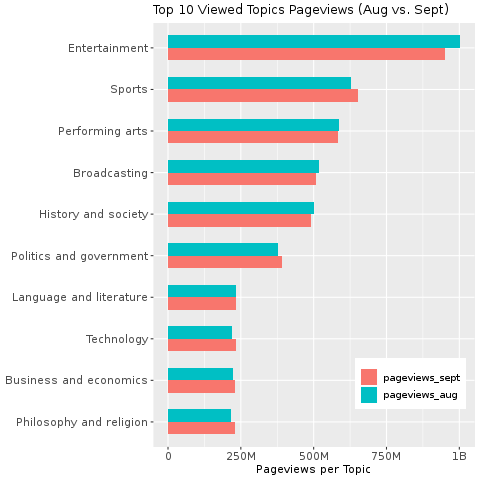

In [100]:
%%R -i topic_rank

data.table(topic_rank)[1:10] %>%
    melt(id.vars = c("topic"), measure.vars = c("pageviews_sept", "pageviews_aug"),variable.name = "month", value.name = 'count') %>%
    ggplot(aes(fill=month, y=count, x=reorder(topic,count))) + 
    geom_bar(position="dodge", stat="identity",width = 0.6) + coord_flip() +
    scale_y_continuous("Pageviews per Topic",
                       labels = polloi::compress) +
    theme(axis.title.y=element_blank(),
          axis.text=element_text(size=11),
          legend.position = c(0.8, 0.15), legend.title = element_blank(),legend.text =element_text( hjust = 0,size = 10))+
    labs(color = "type",
         title = "Top 10 Viewed Topics Pageviews (Aug vs. Sept)")


In [93]:
topic_rank['pv_diff_abs'] = abs(topic_rank['pageviews_sept'] - topic_rank['pageviews_aug'])


In [103]:
pv_diff = topic_rank[['topic','pageviews_sept','pageviews_aug','pv_diff_abs']].head(500).sort_values(by='pv_diff_abs', ascending=False).head(10)


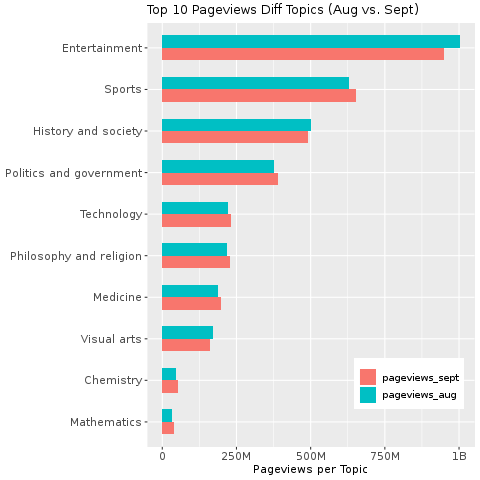

In [104]:
%%R -i pv_diff

data.table(pv_diff) %>%
    melt(id.vars = c("topic"), measure.vars = c("pageviews_sept", "pageviews_aug"),variable.name = "month", value.name = 'count') %>%
    ggplot(aes(fill=month, y=count, x=reorder(topic,count))) + 
    geom_bar(position="dodge", stat="identity",width = 0.6) + coord_flip() +
    scale_y_continuous("Pageviews per Topic",
                       labels = polloi::compress) +
    theme(axis.title.y=element_blank(),
          axis.text=element_text(size=11),
          legend.position = c(0.8, 0.15), legend.title = element_blank(),legend.text =element_text( hjust = 0,size = 10))+
    labs(color = "type",
         title = "Top 10 Pageviews Diff Topics (Aug vs. Sept)")
